# Fake News Detection using Conflicting Viewpoint

In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df1 = pd.read_csv("politifact_comment_no_ignore.tsv",sep='\t')
with pd.option_context('display.max_colwidth', None):
  display(df1)

id  \
0    politifact14856   
1    politifact13806   
2    politifact13515   
3    politifact15307   
4    politifact15232   
..               ...   
410     politifact98   
411    politifact959   
412   politifact3428   
413  politifact13310   
414  politifact11208   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [3]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [4]:
# loading the dataset to a pandas DataFrame
df2 = pd.read_csv("politifact_content_no_ignore.tsv",sep='\t')
with pd.option_context('display.max_colwidth', None):
  display(df2)

id  label  \
0    politifact14856      1   
1    politifact13806      1   
2    politifact13515      1   
3    politifact15307      1   
4    politifact15232      1   
..               ...    ...   
410     politifact98      0   
411    politifact959      0   
412   politifact3428      0   
413  politifact13310      0   
414  politifact11208      0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [5]:
df1.shape

(415, 2)

In [6]:
# counting the number of missing values in the dataset
df2.isnull().sum()

id         0
label      0
content    0
dtype: int64

In [7]:
numbers = df2["label"]
df1 = df1.join(numbers)


In [8]:
numbers2 = df2["content"]
df1 = df1.join(numbers2)


In [9]:
df1


,id,comment,label,content
0,politifact14856,What about Nancy Pelosi I thought they skipped...,1,Originally Posted by opsspec1991 Originally Po...
1,politifact13806,False Thank you Snopes I thought that was just...,1,UI Notice: The comments were found not to be t...
2,politifact13515,So he’s taking credit for policies that were a...,1,See more of Sid Miller on Facebook
3,politifact15307,I dont think he didnt have to worry about trut...,1,Barack Obama has decided to spend his retireme...
4,politifact15232,This seems to put the claim into perspective,1,804 SHARES Share TweetAnd once again the mains...
...,...,...,...,...
410,politifact98,Nobody wants to see her naked nobody::Why tho ...,0,Fred Thompson is laying on the southern-fried ...
411,politifact959,They illegally obtain the transcripts in order...,0,You are using an older browser version. Please...
412,politifact3428,Also theres no savings account that contains m...,0,Supreme Court Case: Flemming vs. NestorBackgro...
413,politifact13310,NarroVictor the construction workers down the ...,0,Workers leave the site of the future Trump Int...


In [10]:
# separating the data & label
X = df1["comment"]
Y = df1["label"]

In [11]:
print(X)
print(Y)

0      What about Nancy Pelosi I thought they skipped...
1      False Thank you Snopes I thought that was just...
2      So he’s taking credit for policies that were a...
3      I dont think he didnt have to worry about trut...
4           This seems to put the claim into perspective
                             ...                        
410    Nobody wants to see her naked nobody::Why tho ...
411    They illegally obtain the transcripts in order...
412    Also theres no savings account that contains m...
413    NarroVictor the construction workers down the ...
414    DirkvonderHorst We must conduct a War on Voter...
Name: comment, Length: 415, dtype: object
0      1
1      1
2      1
3      1
4      1
      ..
410    0
411    0
412    0
413    0
414    0
Name: label, Length: 415, dtype: int64


Stemming:

Stemming is the process of reducing a word to its Root word

example:
actor, actress, acting --> act

In [12]:
port_stem = PorterStemmer()

In [13]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [14]:
df1['comment'] = df1['comment'].apply(stemming)

In [15]:
#df1 = pd.read_csv("fakenewsnetpreprocesseddataset.csv")

In [16]:
print(df1['comment'])

0      nanci pelosi thought skip meet tax reform roma...
1      fals thank snope thought crazi even time halle...
2      take credit polici alreadi place adriangarciah...
3      dont think didnt worri truth come news sourc o...
4                                seem put claim perspect
                             ...                        
410    nobodi want see nake nobodi tho serious jonahh...
411    illeg obtain transcript order see find someth ...
412    also there save account contain money paid soc...
413    narrovictor construct worker street homeland s...
414    dirkvonderhorst must conduct war voter fraud c...
Name: comment, Length: 415, dtype: object


In [17]:
#separating the data and label
X = df1['comment']
Y = df1['label']

In [18]:
print(X)

0      nanci pelosi thought skip meet tax reform roma...
1      fals thank snope thought crazi even time halle...
2      take credit polici alreadi place adriangarciah...
3      dont think didnt worri truth come news sourc o...
4                                seem put claim perspect
                             ...                        
410    nobodi want see nake nobodi tho serious jonahh...
411    illeg obtain transcript order see find someth ...
412    also there save account contain money paid soc...
413    narrovictor construct worker street homeland s...
414    dirkvonderhorst must conduct war voter fraud c...
Name: comment, Length: 415, dtype: object


In [19]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
410    0
411    0
412    0
413    0
414    0
Name: label, Length: 415, dtype: int64


In [20]:
df1.shape

(415, 4)

In [21]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [22]:
print(X)

  (0, 54530)	0.005584344803664777
  (0, 54496)	0.011127363245725245
  (0, 54489)	0.009345128959299091
  (0, 54473)	0.010616720983914956
  (0, 54422)	0.014979284312237452
  (0, 54406)	0.016322806879958716
  (0, 54402)	0.010415453118378217
  (0, 54308)	0.006998850519739109
  (0, 54285)	0.011127363245725245
  (0, 54276)	0.014823783960393128
  (0, 54215)	0.009006401709963514
  (0, 54168)	0.011127363245725245
  (0, 54151)	0.011127363245725245
  (0, 54150)	0.011127363245725245
  (0, 54138)	0.009798348315062485
  (0, 54110)	0.0036184509853952117
  (0, 54105)	0.010170316409945842
  (0, 54007)	0.00919843471725102
  (0, 53941)	0.00919843471725102
  (0, 53818)	0.006205261181055388
  (0, 53809)	0.004483134506148024
  (0, 53756)	0.007463533687715276
  (0, 53736)	0.004650478824771525
  (0, 53700)	0.010415453118378217
  (0, 53673)	0.011127363245725245
  :	:
  (414, 2188)	0.010484098210501964
  (414, 2175)	0.00771634356392075
  (414, 2168)	0.024952524529964798
  (414, 2025)	0.020845180529633026
  (414

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Splitting the dataset to training & test data

# Training the Model: Logistic Regression

In [24]:
model = LogisticRegression()

In [25]:
history=model.fit(X_train, Y_train)

# Evaluation

# accuracy score

In [26]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [27]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.858433734939759


In [28]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [29]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7228915662650602


# Learning Curve

# Making a Predictive System

In [30]:
X_new = X_test[3]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==1):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Real


In [31]:
print(X_test[3])

  (0, 54667)	0.007615344066401314
  (0, 54489)	0.04021940812673249
  (0, 54473)	0.007615344066401314
  (0, 54422)	0.06446759074424002
  (0, 54409)	0.010572765611710585
  (0, 54406)	0.007805535608005317
  (0, 54403)	0.0074815688450459465
  (0, 54382)	0.01596325264578595
  (0, 54314)	0.01421732490147264
  (0, 54276)	0.005316529246432491
  (0, 54149)	0.011669262747565703
  (0, 54142)	0.17751840221615328
  (0, 54138)	0.02811331062187482
  (0, 54105)	0.019453704860034185
  (0, 54034)	0.008177407258939087
  (0, 53849)	0.012471397157159331
  (0, 53815)	0.029883900772787974
  (0, 53767)	0.040887036294695436
  (0, 53756)	0.021414286791276244
  (0, 53751)	0.015323125269340284
  (0, 53736)	0.013343101463363267
  (0, 53648)	0.015016778759567386
  (0, 53638)	0.006109487539143861
  (0, 53634)	0.03467145614242567
  (0, 53606)	0.006431479514625779
  :	:
  (0, 865)	0.007756624531411189
  (0, 850)	0.008120801701524329
  (0, 815)	0.010560047322199482
  (0, 798)	0.024641499810704626
  (0, 745)	0.038076720

# # Confusion Matrix

In [32]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(Y_test,X_test_prediction)
cnf_matrix

array([[10, 22],
       [ 1, 50]])

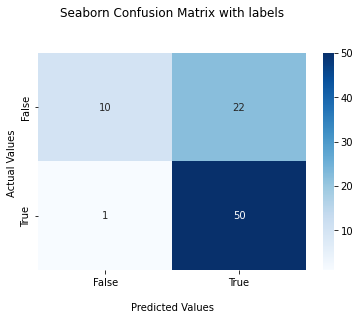

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Get the percentages of Positive Comments

In [34]:
#Get the percentages of Positive Comments
pcomments=df1[df1.label==1]
pcomments=pcomments['comment']
round((pcomments.shape[0]/df1.shape[0])*100,1)


65.1

## Get the percentages of Negative Comments

In [35]:
#Get the percentages of Negative Comments
ncomments=df1[df1.label==0]
ncomments=ncomments['comment']
round((ncomments.shape[0]/df1.shape[0])*100,1)


34.9

In [36]:
df1['label'].value_counts()

1    270
0    145
Name: label, dtype: int64

In [37]:
import matplotlib.pyplot as plt

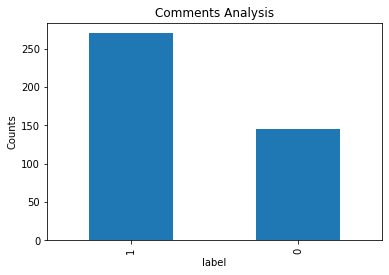

In [38]:
#plot and visualise the counts
plt.title('Comments Analysis')
plt.xlabel('label')
plt.ylabel('Counts')
df1['label'].value_counts().plot(kind="bar")
plt.show()

In [39]:
dict={}
for i in range(1,100):
   model = LogisticRegression(max_iter=i)
   model.fit(X_train, Y_train)
   acc =  model.score(X_train, Y_train)
   dict[i]=acc
dict

/home/amit/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/amit/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

/home/amit/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/amit/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

{1: 0.6596385542168675,
 2: 0.6596385542168675,
 3: 0.6596385542168675,
 4: 0.6867469879518072,
 5: 0.8674698795180723,
 6: 0.8795180722891566,
 7: 0.8493975903614458,
 8: 0.8373493975903614,
 9: 0.8253012048192772,
 10: 0.8162650602409639,
 11: 0.8283132530120482,
 12: 0.8554216867469879,
 13: 0.8674698795180723,
 14: 0.8734939759036144,
 15: 0.8644578313253012,
 16: 0.8644578313253012,
 17: 0.8554216867469879,
 18: 0.8554216867469879,
 19: 0.8554216867469879,
 20: 0.858433734939759,
 21: 0.858433734939759,
 22: 0.858433734939759,
 23: 0.858433734939759,
 24: 0.858433734939759,
 25: 0.858433734939759,
 26: 0.858433734939759,
 27: 0.858433734939759,
 28: 0.858433734939759,
 29: 0.858433734939759,
 30: 0.858433734939759,
 31: 0.858433734939759,
 32: 0.858433734939759,
 33: 0.858433734939759,
 34: 0.858433734939759,
 35: 0.858433734939759,
 36: 0.858433734939759,
 37: 0.858433734939759,
 38: 0.858433734939759,
 39: 0.858433734939759,
 40: 0.858433734939759,
 41: 0.858433734939759,
 42: 0

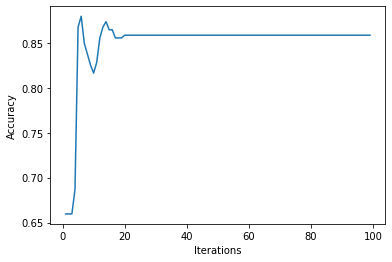

In [40]:
myList = dict.items()
x, y = zip(*myList)  
plt.plot(x, y)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

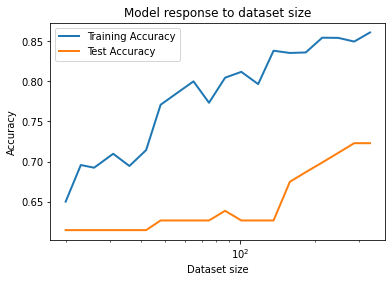

In [41]:
from sklearn import metrics
def data_size_response(model,trX,teX,trY,teY,score_func,prob=True,n_subsets=20):

    train_errs,test_errs = [],[]
    subset_sizes = np.exp(np.linspace(3,np.log(trX.shape[0]),n_subsets)).astype(int)

    for m in subset_sizes:
        model.fit(trX[:m],trY[:m])
        if prob:
            train_err = score_func(trY[:m],model.predict_proba(trX[:m]))
            test_err = score_func(teY,model.predict_proba(teX))
        else:
            train_err = score_func(trY[:m],model.predict(trX[:m]))
            test_err = score_func(teY,model.predict(teX))
       # print "training error: %.3f test error: %.3f subset size: %.3f" % (train_err,test_err,m)
        train_errs.append(train_err)
        test_errs.append(test_err)

    return subset_sizes,train_errs,test_errs

def plot_response(subset_sizes,train_errs,test_errs):

    plt.plot(subset_sizes,train_errs,lw=2)
    plt.plot(subset_sizes,test_errs,lw=2)
    plt.legend(['Training Accuracy','Test Accuracy'])
    plt.xscale('log')
    plt.xlabel('Dataset size')
    plt.ylabel('Accuracy')
    plt.title('Model response to dataset size')
    plt.show()

model = LogisticRegression()
model.fit(X_train, Y_train)
score_func =  model.score(X_train, Y_train)
response = data_size_response(model,X_train,X_test,Y_train,Y_test,accuracy_score,prob=False)
plot_response(*response)